In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
# %matplotlib widget
%matplotlib inline

In [3]:
mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data')
x = tf.placeholder(tf.float32, [None, 784])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
def sigmoidNN(x):
    layer1 = tf.layers.dense(x, 256, activation=tf.nn.sigmoid, use_bias = True)
    layer2 = tf.layers.dense(layer1, 256, activation=tf.nn.sigmoid, use_bias = True)
    layer3 = tf.layers.dense(layer2, 10, activation=None, use_bias = True)
    return layer3

In [5]:
def cosineNN(x):
    layer1_cos = tf.layers.dense(x, 256, activation=tf.cos, use_bias = True)
    layer2_cos = tf.layers.dense(layer1_cos, 256, activation=tf.cos, use_bias = True)
    layer3_cos = tf.layers.dense(layer2_cos, 10, activation=None, use_bias = True)
    return layer3_cos

In [18]:
def signNN(x):
    layer1_sin = tf.layers.dense(x, 256, activation=tf.sin, use_bias = True)
    layer2_sin = tf.layers.dense(layer1_sin, 256, activation=tf.sin, use_bias = True)
    layer3_sin = tf.layers.dense(layer2_sin, 10, activation=None, use_bias = True)
    return layer3_sin

In [19]:
sigmoid_Networks = sigmoidNN(x)
cosine_Networks = cosineNN(x)
sine_Networks = signNN(x)

In [20]:
y_ = tf.placeholder(tf.int64, [None])

In [21]:
cross_entropy_sigmoid = tf.losses.sparse_softmax_cross_entropy(labels=y_, logits=sigmoid_Networks)
cross_entropy_cos = tf.losses.sparse_softmax_cross_entropy(labels=y_, logits=cosine_Networks)
cross_entropy_sin = tf.losses.sparse_softmax_cross_entropy(labels=y_, logits=sine_Networks)

train_step_sigmoid = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_sigmoid)
train_step_cos = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_cos)
train_step_sin = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_sin)

In [22]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

/Users/kwanghoonan/tensorflow/lib/python2.7/site-packages/tensorflow/python/client/session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [23]:
correct_prediction_sigmoid = tf.equal(tf.argmax(sigmoid_Networks, 1), y_)
accuracy_sigmoid = tf.reduce_mean(tf.cast(correct_prediction_sigmoid, tf.float32))
correct_prediction_cos = tf.equal(tf.argmax(cosine_Networks, 1), y_)
accuracy_cos = tf.reduce_mean(tf.cast(correct_prediction_cos, tf.float32))
correct_prediction_cos = tf.equal(tf.argmax(sine_Networks, 1), y_)
accuracy_sin = tf.reduce_mean(tf.cast(correct_prediction_cos, tf.float32))

In [24]:
acc_sigmoid = []
acc_cos = []
acc_sin = []

loss_sigmoid = []
loss_cos = []
loss_sin = []

In [25]:
for i in range(10000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    _, sigmoid_loss = sess.run([train_step_sigmoid, cross_entropy_sigmoid], feed_dict={x: batch_xs, y_ : batch_ys})
    _, cos_loss = sess.run([train_step_cos, cross_entropy_cos], feed_dict={x: batch_xs, y_ : batch_ys})
    _, sin_loss = sess.run([train_step_sin, cross_entropy_sin], feed_dict={x: batch_xs, y_ : batch_ys})
    
    if i % 50 == 0:
        acc1, acc2, acc3 = sess.run([accuracy_sigmoid, accuracy_cos, accuracy_sin], feed_dict={x: mnist.test.images, y_:mnist.test.labels})
        acc_sigmoid.append(acc1)
        acc_cos.append(acc2)
        acc_sin.append(acc3)
        loss_sigmoid.append(sigmoid_loss)
        loss_cos.append(cos_loss)
        loss_sin.append(sin_loss)

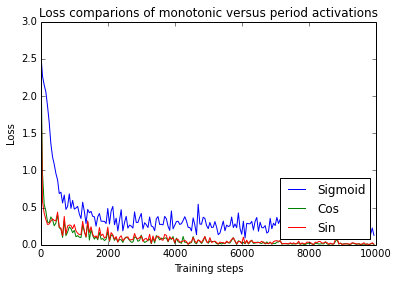

In [26]:
# %matplotlib inline  
fig, ax = plt.subplots()
ax.plot(range(0, len(loss_sigmoid)*50, 50), loss_sigmoid, label='Sigmoid')
ax.plot(range(0, len(loss_sigmoid)*50, 50), loss_cos, label='Cos')
ax.plot(range(0, len(loss_sigmoid)*50, 50), loss_sin, label='Sin')
ax.set_xlabel('Training steps')
ax.set_ylabel('Loss')
ax.set_title('Loss comparions of monotonic versus period activations')
ax.legend(loc=4)
# plt.show()

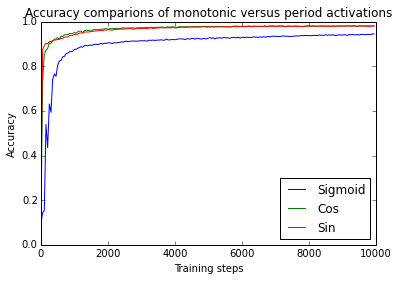

In [27]:
fig, ax = plt.subplots()
ax.plot(range(0, len(loss_sigmoid)*50, 50), acc_sigmoid, label='Sigmoid')
ax.plot(range(0, len(loss_sigmoid)*50, 50), acc_cos, label='Cos')
ax.plot(range(0, len(loss_sigmoid)*50, 50), acc_sin, label='Sin')
ax.set_xlabel('Training steps')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy comparions of monotonic versus period activations')
ax.legend(loc=4)

In [28]:
acc_sigmoid[-1], acc_cos[-1], acc_sin[-1]

(0.9441, 0.9814, 0.9801)